In [3]:
import numpy as np
import pandas as pd
import re,string  #regular expression or RegEx in python
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  #Natural Language ToolKit
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SU3ARNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('twitter_training.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
44846,11701,Verizon,Negative,@verizon this is to notify you that ur company...
67906,3630,Cyberpunk2077,Positive,@CyberpunkGame its 19th 2020 release date and ...
33870,6617,Fortnite,Negative,"Fortnite bullies me, right?. I. NEED. HIM! pic..."
61119,4876,GrandTheftAuto(GTA),Positive,Thank god fuck
45123,11748,Verizon,Positive,Chorus Thank you @davematthewsbnd & @verizon a...
...,...,...,...,...
70753,10920,TomClancysGhostRecon,Neutral,@ GhostRecon the games have their problems but...
22203,4199,CS-GO,Positive,"The I know I should be studying but fuck it, a..."
74066,9090,Nvidia,Neutral,E2E Networks is pleased to bring you new Test ...
19835,12596,WorldOfCraft,Neutral,I just earned the [Scrappy's Best Friend] Achi...


In [5]:
#No of a categories
len(set(df['Borderlands']))

32

In [6]:
df.groupby('Borderlands').Borderlands.count()

Borderlands
Amazon                               2316
ApexLegends                          2376
AssassinsCreed                       2244
Battlefield                          2346
Borderlands                          2285
CS-GO                                2304
CallOfDuty                           2394
CallOfDutyBlackopsColdWar            2376
Cyberpunk2077                        2304
Dota2                                2364
FIFA                                 2340
Facebook                             2370
Fortnite                             2274
Google                               2298
GrandTheftAuto(GTA)                  2304
Hearthstone                          2298
HomeDepot                            2310
LeagueOfLegends                      2394
MaddenNFL                            2400
Microsoft                            2400
NBA2K                                2352
Nvidia                               2298
Overwatch                            2334
PlayStation5(PS5)     

In [7]:
df.columns=['id','information','type','text']
df.head()

,id,information,type,text
44846,11701,Verizon,Negative,@verizon this is to notify you that ur company...
67906,3630,Cyberpunk2077,Positive,@CyberpunkGame its 19th 2020 release date and ...
33870,6617,Fortnite,Negative,"Fortnite bullies me, right?. I. NEED. HIM! pic..."
61119,4876,GrandTheftAuto(GTA),Positive,Thank god fuck
45123,11748,Verizon,Positive,Chorus Thank you @davematthewsbnd & @verizon a...


In [8]:
df.shape

(74681, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74681 entries, 44846 to 14371
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           74681 non-null  int64 
 1   information  74681 non-null  object
 2   type         74681 non-null  object
 3   text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [10]:
# Check for missing values in the training dataset
print("Missing values in Training Dataset:")
print(df.isnull().sum())

Missing values in Training Dataset:
id               0
information      0
type             0
text           686
dtype: int64


In [11]:
df = df.dropna(subset=['text'])

In [12]:
print("Missing values in Training Dataset:")
print(df.isnull().sum())

Missing values in Training Dataset:
id             0
information    0
type           0
text           0
dtype: int64


In [13]:
df.shape

(73995, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 44846 to 14371
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           73995 non-null  int64 
 1   information  73995 non-null  object
 2   type         73995 non-null  object
 3   text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [15]:
# sentiment types
df['type'].value_counts()

type
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

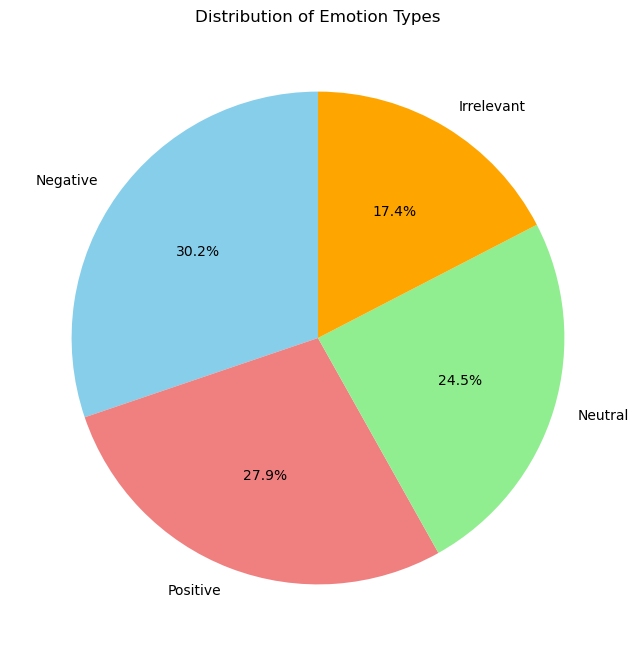

In [16]:
# Check the distribution of the 'type' column
type_counts = df['type'].value_counts()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Emotion Types')
plt.show()

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
 
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SU3ARNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SU3ARNA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
df.loc[:, 'cleaned_text'] = df['text'].apply(preprocess_text)
df

C:\Users\SU3ARNA\AppData\Local\Temp\ipykernel_3096\1449415632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'cleaned_text'] = df['text'].apply(preprocess_text)


,id,information,type,text,cleaned_text
44846,11701,Verizon,Negative,@verizon this is to notify you that ur company...,verizon notify ur company harassing payment ow...
67906,3630,Cyberpunk2077,Positive,@CyberpunkGame its 19th 2020 release date and ...,cyberpunkgame th release date pushed back curi...
33870,6617,Fortnite,Negative,"Fortnite bullies me, right?. I. NEED. HIM! pic...",fortnite bullies right need pictwittercom qyxu...
61119,4876,GrandTheftAuto(GTA),Positive,Thank god fuck,thank god fuck
45123,11748,Verizon,Positive,Chorus Thank you @davematthewsbnd & @verizon a...,chorus thank davematthewsbnd verizon making di...
...,...,...,...,...,...
70753,10920,TomClancysGhostRecon,Neutral,@ GhostRecon the games have their problems but...,ghostrecon games problems ive definitely enjoy...
22203,4199,CS-GO,Positive,"The I know I should be studying but fuck it, a...",know studying fuck anyone cs go pictwittercomh...
74066,9090,Nvidia,Neutral,E2E Networks is pleased to bring you new Test ...,ee networks pleased bring new test drive progr...
19835,12596,WorldOfCraft,Neutral,I just earned the [Scrappy's Best Friend] Achi...,earned scrappys best friend achievement


In [19]:
df.to_csv('cleaned_tweets.csv')

In [20]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['cleaned_text']
Y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

 #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression(random_state=1, max_iter=1000))])




# #Training model
model = pipeline.fit(X_train, y_train)



In [21]:
print(X_test,y_test)

55438                                                 ever
17447    aww thats shame actually dig white new ps cont...
31446    stop playing league legends maybe find fucking...
22922    rhandlerr homophobes nickname gay gunner block...
33749    check awesome new app called trax best fortnit...
                               ...                        
10615    nice video jeffgrubb explaining autohdr functi...
54730                   callofduty da ya took bountys game
8044                                                      
67022    johnson johnson announces selling talcbased ha...
10975                                            cant wait
Name: cleaned_text, Length: 11100, dtype: object 55438      Negative
17447      Negative
31446      Negative
22922      Negative
33749    Irrelevant
            ...    
10615       Neutral
54730      Negative
8044       Negative
67022       Neutral
10975      Positive
Name: type, Length: 11100, dtype: object


In [28]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
print(accuracy_score(y_test,predict_news_cat))


0.6160360360360361


In [23]:
tweets = input("Enter tweets = ")
tweets_data = {'predict_tweets':[tweets]}
tweets_data_df = pd.DataFrame(tweets_data)

predict_tweets_cat = model.predict(tweets_data_df['predict_tweets'])
print("Predicted tweets type = ",predict_tweets_cat[0])

Enter tweets = i am happy
Predicted tweets type =  Positive


              precision    recall  f1-score   support

  Irrelevant       0.64      0.42      0.51      1940
    Negative       0.67      0.73      0.70      3324
     Neutral       0.54      0.58      0.56      2796
    Positive       0.62      0.65      0.63      3040

    accuracy                           0.62     11100
   macro avg       0.62      0.59      0.60     11100
weighted avg       0.62      0.62      0.61     11100

[[ 811  339  387  403]
 [ 119 2430  467  308]
 [ 188  475 1621  512]
 [ 142  394  528 1976]]


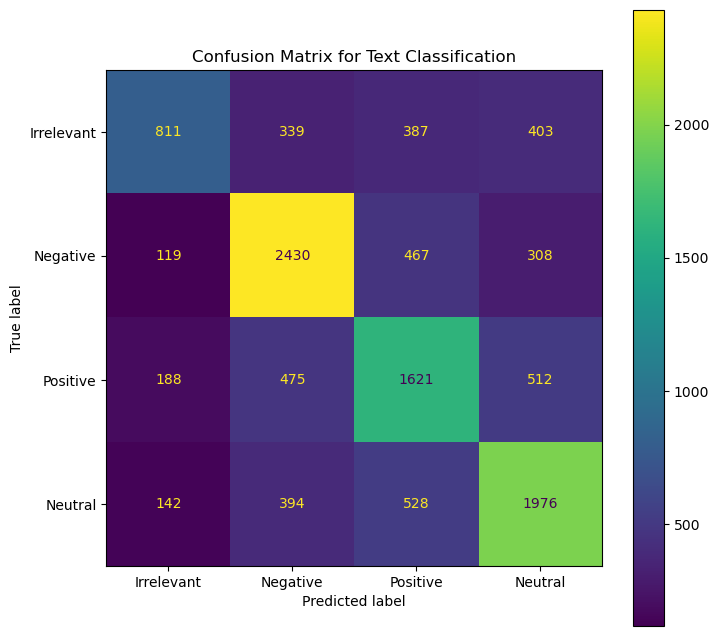

In [24]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest,model.predict(X_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['Irrelevant','Negative','Positive','Neutral']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Text Classification')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);